In [34]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

data = pd.read_csv(url, sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [12]:
data.sample(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
20743,Apartamento,Recreio dos Bandeirantes,2,1,2,75,1700.0,1020.0,170.0
5786,Apartamento,Copacabana,3,1,1,140,6000.0,1200.0,NaN
21811,Apartamento,Tijuca,2,0,0,74,1500.0,780.0,77.0
31874,Apartamento,Copacabana,1,0,0,35,1300.0,350.0,50.0
23383,Apartamento,Camorim,3,2,1,73,1900.0,760.0,79.0
19578,Apartamento,Oswaldo Cruz,1,0,0,50,700.0,NaN,NaN
24250,Conjunto Comercial/Sala,Leblon,0,1,0,143,16000.0,2220.0,1257.0
9092,Casa de Condomínio,Barra da Tijuca,6,9,5,1100,35000.0,3500.0,NaN
3082,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,21,1300.0,594.0,1051.0
2188,Conjunto Comercial/Sala,Centro,0,0,0,4,450.0,NaN,NaN


In [ ]:
# caracteristicas do dataset
# Tipos de cada coluna
data.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [8]:
# 
rows, columns = data.shape
f'Linhas: {rows} e  {columns} Colunas:'

'Linhas: 32960 e  9 Colunas:'

In [11]:
data.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [25]:
data.groupby('Tipo')

### Valores medios de aluguel por tipo de imovel

In [27]:
average_type = data.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor',ascending=False)
average_type

,Valor
Tipo,
Prédio Inteiro,498637.239203
Indústria,120000.000000
Galpão/Depósito/Armazém,53407.062600
Terreno Padrão,32567.714286
Hotel,25000.000000
Loteamento/Condomínio,22000.000000
Conjunto Comercial/Sala,14715.045521
Casa Comercial,14478.264151
Loja/Salão,13769.646770


<Axes: ylabel='Tipo'>

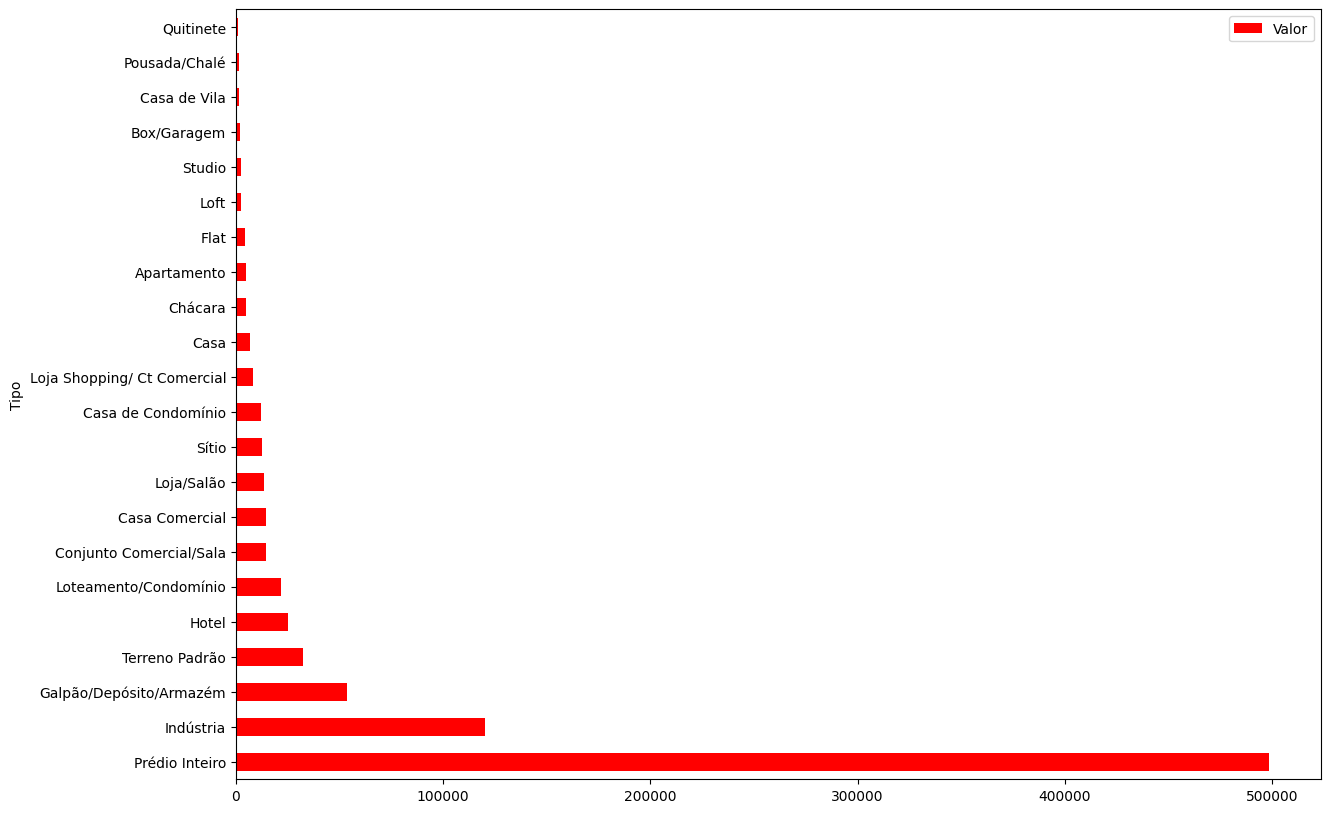

In [35]:
average_type.plot(kind='barh', figsize=(14,10), color='red')

In [39]:
# Percentual de cada tipo de imovel na base de dados

percentage_type = data['Tipo'].value_counts(normalize=True).mul(100).map(lambda x: f'{x:.2f}%')
percentage_type

Tipo
Apartamento                    59.26%
Conjunto Comercial/Sala        20.68%
Loja/Salão                      4.33%
Casa de Condomínio              3.02%
Casa                            2.93%
Quitinete                       2.54%
Galpão/Depósito/Armazém         1.89%
Flat                            1.44%
Prédio Inteiro                  0.91%
Casa Comercial                  0.80%
Casa de Vila                    0.76%
Loja Shopping/ Ct Comercial     0.75%
Box/Garagem                     0.25%
Terreno Padrão                  0.21%
Loft                            0.15%
Sítio                           0.03%
Loteamento/Condomínio           0.02%
Studio                          0.01%
Hotel                           0.01%
Chácara                         0.00%
Pousada/Chalé                   0.00%
Indústria                       0.00%
Name: proportion, dtype: object

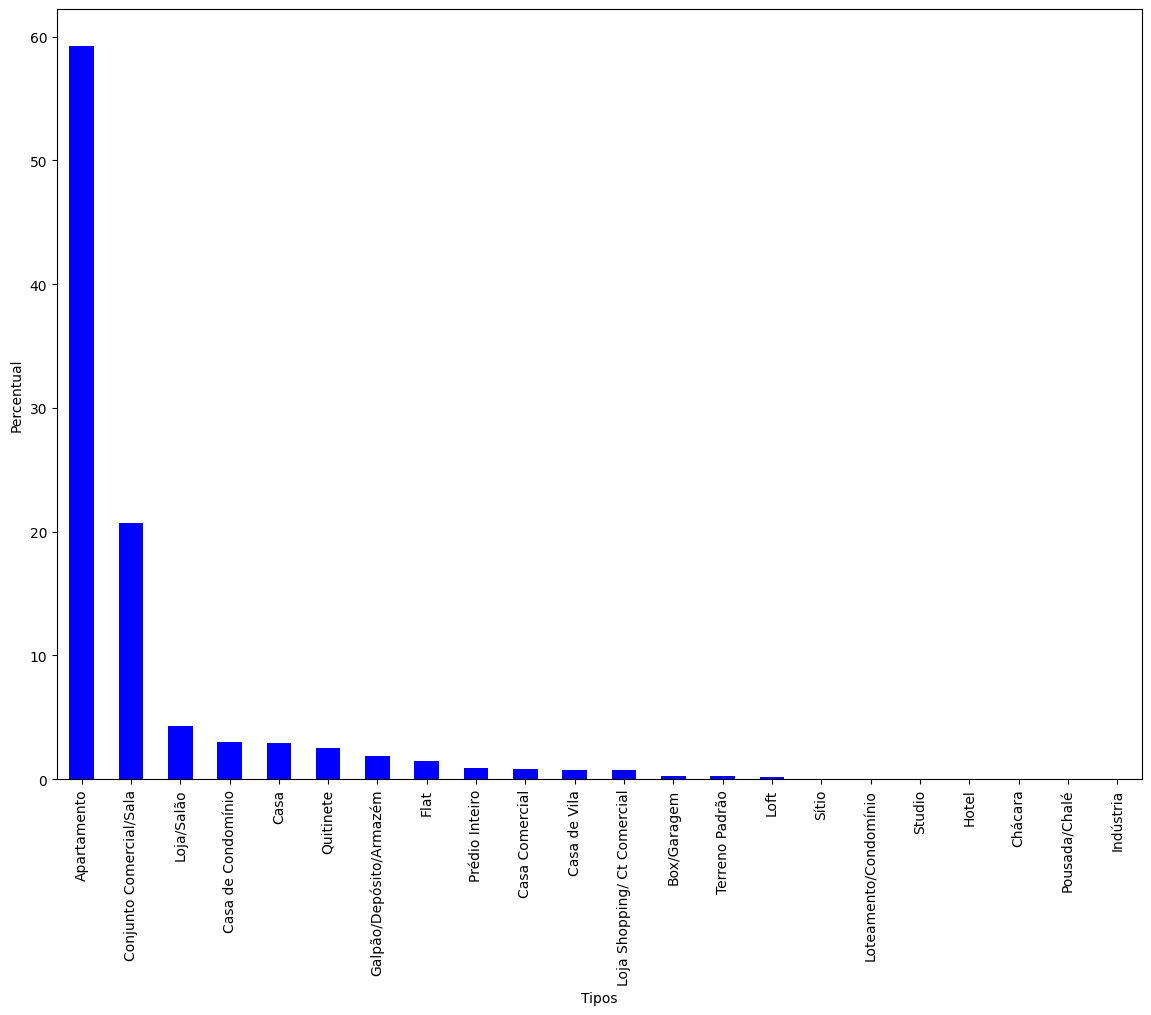

In [43]:
percentage_type = data['Tipo'].value_counts(normalize=True).mul(100).plot(kind='bar', figsize=(14,10), color='blue', xlabel='Tipos', ylabel='Percentual')

#### Trabalhar apenas com imoveis do tipo apartamento

In [60]:
apartamentos = data[data['Tipo'] == 'Apartamento']
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19532 entries, 3 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19525 non-null  float64
 7   Condominio  18787 non-null  float64
 8   IPTU        14060 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


### Verificar existencia de nulos

In [61]:
apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [63]:
# Tratar os nulos

apartamentos.fillna(0, inplace=True)

/tmp/ipykernel_6138/3609697715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartamentos.fillna(0, inplace=True)


In [64]:
apartamentos.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

#### Removendo registros inconsistentes

remover linhas onde Valor e Condominio sejam 0

In [65]:
apartamentos[apartamentos['Valor'] == 0]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,0.0,878.0,0.0
2941,Apartamento,Botafogo,2,0,0,95,0.0,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,0.0,850.0,0.0
12683,Apartamento,Leme,2,0,1,75,0.0,878.0,0.0
13229,Apartamento,Glória,3,0,1,135,0.0,910.0,228.0
13525,Apartamento,Gávea,3,1,1,105,0.0,880.0,221.0


In [66]:
apartamentos[apartamentos['Condominio'] == 0]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
194,Apartamento,Barra da Tijuca,1,1,1,65,2350.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [ ]:
# Usei  o query para buscar minha condicao
apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [69]:
# Com o .index tenho uma lista conde as ocorrencias da minha condicao estao.
rows_to_remove = apartamentos.query('Valor == 0 | Condominio == 0').index

In [70]:
apartamentos.drop(rows_to_remove, axis=0, inplace=True)

/tmp/ipykernel_6138/1668011329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartamentos.drop(rows_to_remove, axis=0, inplace=True)


In [71]:
# Efetuando novamente a chamada para verificar se foi correto
apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


#### Aplicando Filtros

Nesse momento, o time de ML deseja avaliar apenas imóveis em cenários específicos, como:

1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;

2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

Com base nisso, precisamos aplicar os filtros necessários para obter essas informações específicas.


In [74]:
# Com 1 quarto e aluguel menor que 1200

one_room_below_1200 = apartamentos.query('Quartos == 1 | Valor < 1200')
one_room_below_1200

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0
...,...,...,...,...,...,...,...,...,...
32935,Apartamento,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [76]:
#Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

two_rooms_below3k_a70 = apartamentos.query("Quartos >= 2 | Valor < 3000 | Area > 70")
two_rooms_below3k_a70

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### Salvar os Dados

In [82]:
apartamentos.to_csv('data/apartamentos.csv', index=False)

one_room_below_1200.to_csv('data/one_room_below_1200.csv', index=False)

two_rooms_below3k_a70.to_csv('data/two_rooms_below3k_a70.csv', index=False)

#### Criar colunas numericas

O time de desenvolvedores do site da empresa solicitou a criação de duas novas colunas numéricas na nossa base de dados. No site dos imóveis, eles gostariam de apresentar informações mais sumarizadas em relação a valores. Para isso, essas colunas serão importantes:

valor_por_mes: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;

valor_por_ano: essa coluna deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.

In [91]:
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_mes,valor_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN


In [86]:
# Valor por mes

data['valor_mes'] = data['Valor'] + data['Condominio']

In [90]:
# Valor por ano
data['valor_ano'] = (data['valor_mes'] * 12) + data['IPTU']

#### Criar colunas categoricas

O time de desenvolvimento solicitou a criação de mais duas colunas. No entanto, dessa vez elas são categóricas:

Descrição: essa coluna deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem;

Possui_suite: essa deve ser uma coluna que informe apenas se o imóvel possui ou não suítes, sem se importar com a quantidade.

In [102]:
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_mes,valor_ano,Descricao,Possui_Suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Apartamento de 40 m² do tipo Quitinete na(o) C...,nao
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Apartamento de 100 m² do tipo Casa na(o) Jardi...,sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Apartamento de 150 m² do tipo Conjunto Comerci...,nao
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento de 15 m² do tipo Apartamento na(o)...,nao
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento de 48 m² do tipo Apartamento na(o)...,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Apartamento de 27 m² do tipo Quitinete na(o) C...,nao
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento de 78 m² do tipo Apartamento na(o)...,sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento de 48 m² do tipo Apartamento na(o)...,nao
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento de 70 m² do tipo Apartamento na(o)...,nao


In [98]:
data['Descricao'] = 'Apartamento de ' + data['Area'].astype(str) + ' m² do tipo ' + data['Tipo'] + ' na(o) ' + data['Bairro'] + ' com ' + data['Quartos'].astype(str)+ 'quarto(s) e ' +data['Vagas'].astype(str) + 'vagas de garegem.'

In [100]:
data['Descricao']

0        Apartamento de 40 m² do tipo Quitinete na(o) C...
1        Apartamento de 100 m² do tipo Casa na(o) Jardi...
2        Apartamento de 150 m² do tipo Conjunto Comerci...
3        Apartamento de 15 m² do tipo Apartamento na(o)...
4        Apartamento de 48 m² do tipo Apartamento na(o)...
                               ...                        
32955    Apartamento de 27 m² do tipo Quitinete na(o) C...
32956    Apartamento de 78 m² do tipo Apartamento na(o)...
32957    Apartamento de 48 m² do tipo Apartamento na(o)...
32958    Apartamento de 70 m² do tipo Apartamento na(o)...
32959    Apartamento de 250 m² do tipo Conjunto Comerci...
Name: Descricao, Length: 32960, dtype: object

In [101]:
data['Possui_Suite'] = data['Suites'].apply(lambda x: 'sim' if x > 0 else 'nao')